# Applied Regression 

In this lecture we will be using the heart failure dataset given here,
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records.

This dataset captures a bunch of information about patients that expereienced heart failure. 


Here we have the data codebook, which lists out the variables and their interpretation 
Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

    Let's begin by reading in the dataset.
    

In [ ]:
heart <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")

### Checkpoint: How many columns does the dataset have?

Let's plot some of the dataset variables.

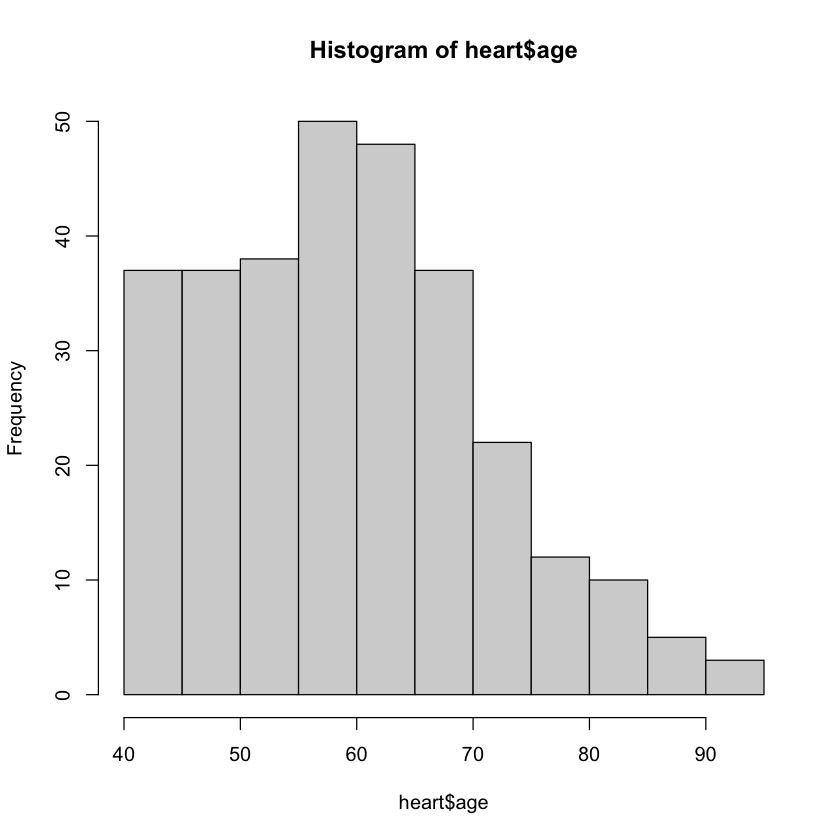

In [8]:
hist(heart$age)

In [9]:
### Checkpoint: What does the age distribution look like?


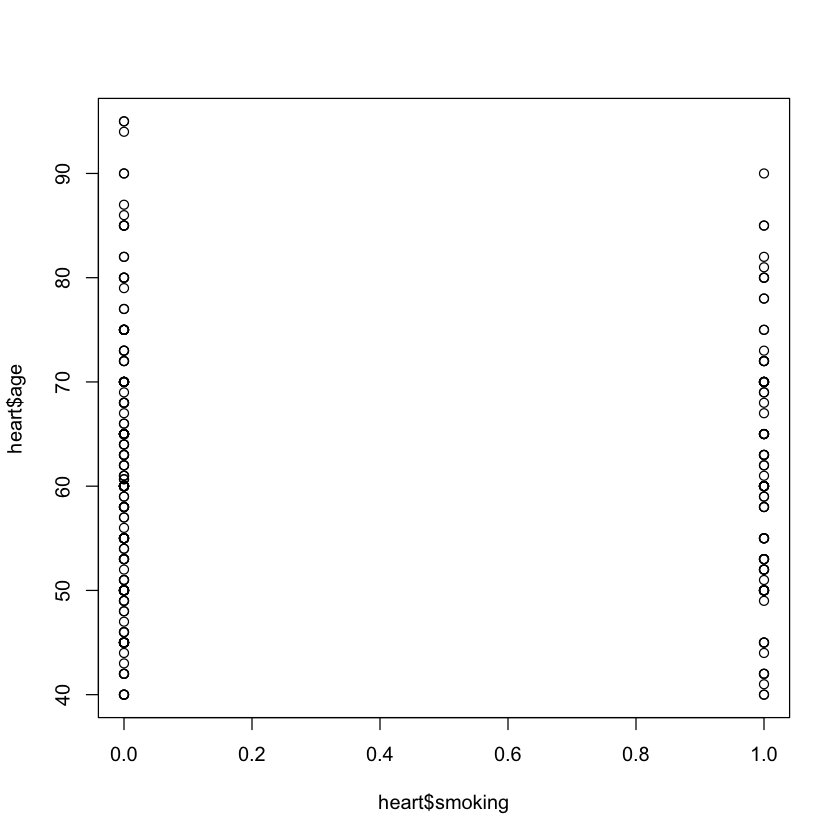

In [14]:
plot(heart$smoking,heart$age)
age_of_smokers <- heart[heart$smoking == 1 ,]$age
age_of_non_smokers <- heart[heart$smoking == 0 ,]$age

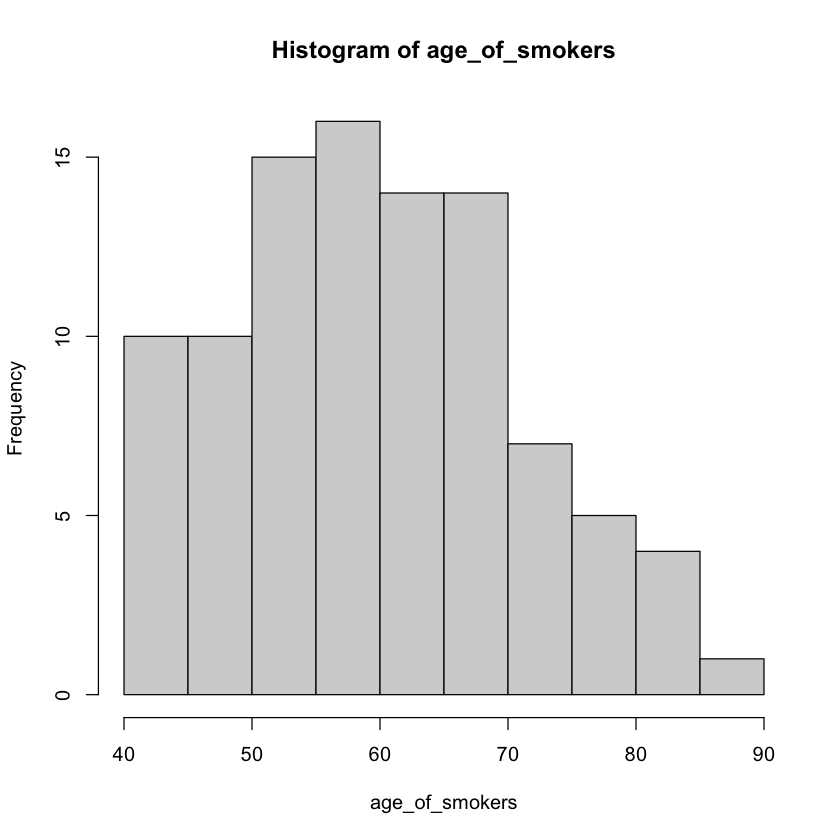

In [15]:
hist(age_of_smokers)

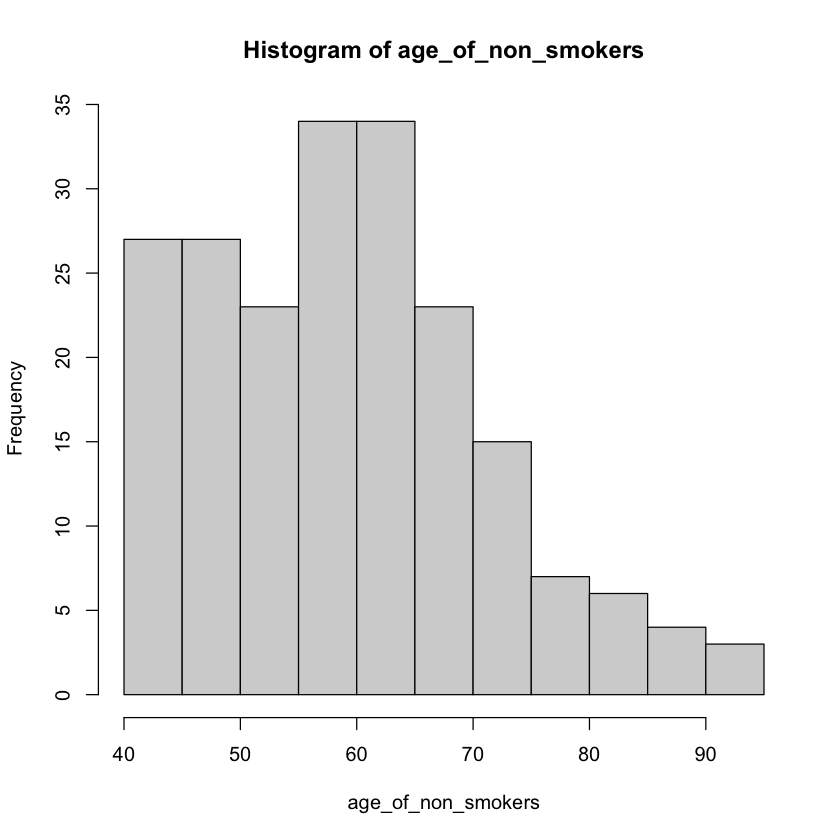

In [16]:
hist(age_of_non_smokers)

In [17]:
mean(age_of_smokers) - mean(age_of_non_smokers)

[1] 0.4748017

Warning message in age_of_smokers - age_of_non_smokers:
“longer object length is not a multiple of shorter object length”


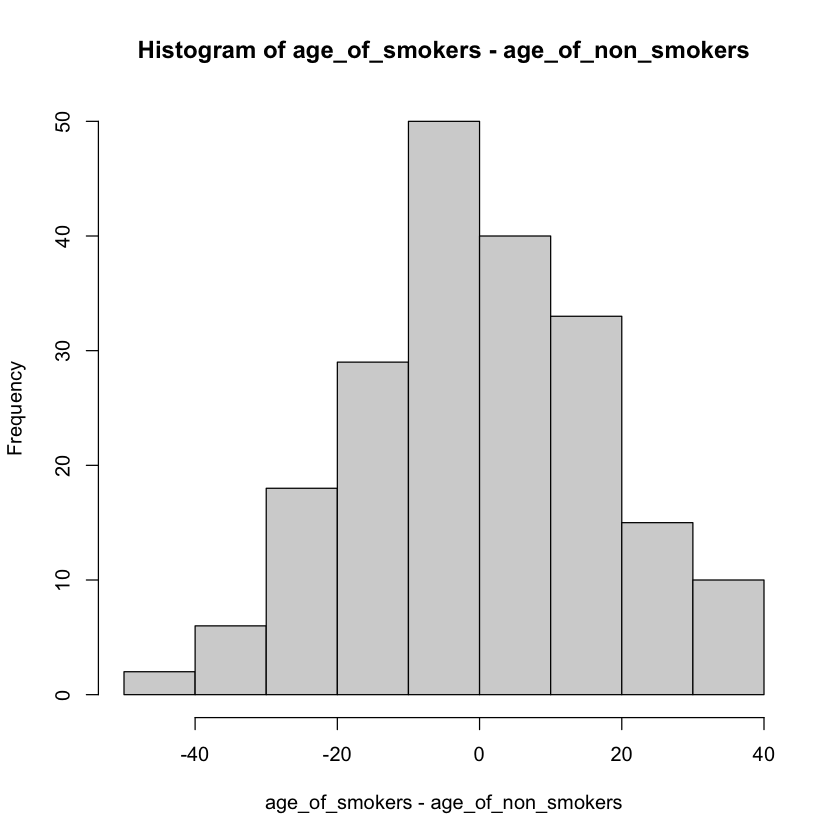

In [18]:
hist(age_of_smokers - age_of_non_smokers)

### Checkpoint: Is high blood pressure associated with higher rate of heart attacks